In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
clusters <- read.table(
    "../../Abed-SI-Mapping/metadata_skin_samples_reformatted.csv", 
    row.names=1,
    header=TRUE, 
    sep=","
)
head(clusters)

,predicted.ID
,<int>
SPIRT5Pre-Skin336_AAACCTGCAAAGAATC-1,1
SPIRT5Pre-Skin336_AAACCTGCAAAGCGGT-1,4
SPIRT5Pre-Skin336_AAACCTGCACATAACC-1,1
SPIRT5Pre-Skin336_AAACCTGCATACTCTT-1,1
SPIRT5Pre-Skin336_AAACCTGGTAAGAGGA-1,1
SPIRT5Pre-Skin336_AAACCTGGTACAGTGG-1,5


In [3]:
print.cluster.overlap <- function(seurat.fn, label, clusters, cluster.id, min.cells = 1) {
    load(seurat.fn)
    seurat <- AddMetaData(object = seurat, metadata=clusters)
    
    print(DimPlot(seurat) + 
          labs(title=paste(label, "on all Harmony dimensions")))

    pbmc <- factor(c("Skin","PBMC")[1 + as.integer(grepl(x=seurat@meta.data$orig.ident, pattern="PBMC"))])
    h.df <- data.frame(Source=pbmc, seurat@reductions$harmony@cell.embeddings)
    ttests <- lapply(1:20, function(i) {
        t.test(as.formula(paste("harmony_", i, " ~ Source", sep="")), data=h.df)
    })
    p.values <- sapply(ttests, "[[", "p.value")
    plot(p.values)
    harmony.dims <- which(p.values > median(p.values))
    seurat <- RunUMAP(seurat, dims = harmony.dims, verbose = FALSE)
    print(DimPlot(seurat, cells.highlight = rownames(filter(clusters, predicted.ID == 2))) + 
          labs(title=paste(label, "on most platform-neutral dimensions")))
    print(DimPlot(seurat) + 
          labs(title=paste(label, "on most platform-neutral dimensions")))
    
    seurat <- seurat |> 
        FindNeighbors(dims = harmony.dims, reduction="harmony") |> 
        FindClusters(resolution = 0.5)
    print(DimPlot(seurat, group.by="seurat_clusters") + 
          labs(title=paste(label, "on most platform-neutral dimensions")))
    print(table(seurat@meta.data$predicted.ID, seurat@meta.data$seurat_clusters))
    print(table(seurat@meta.data$seurat_clusters, seurat@meta.data$orig.ident))
    overlapping_clusters <- names(which(table(seurat@meta.data$predicted.ID, seurat@meta.data$seurat_clusters)["2",] >= min.cells))
    print(table(seurat@meta.data$seurat_clusters, seurat@meta.data$orig.ident)[overlapping_clusters, ])    

    seurat
}


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


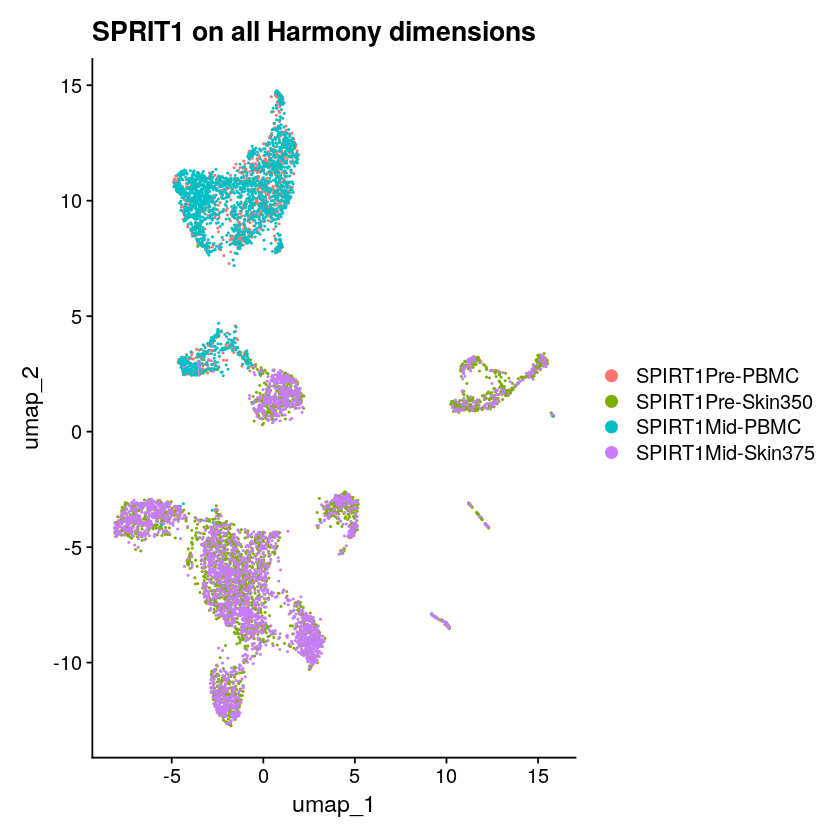

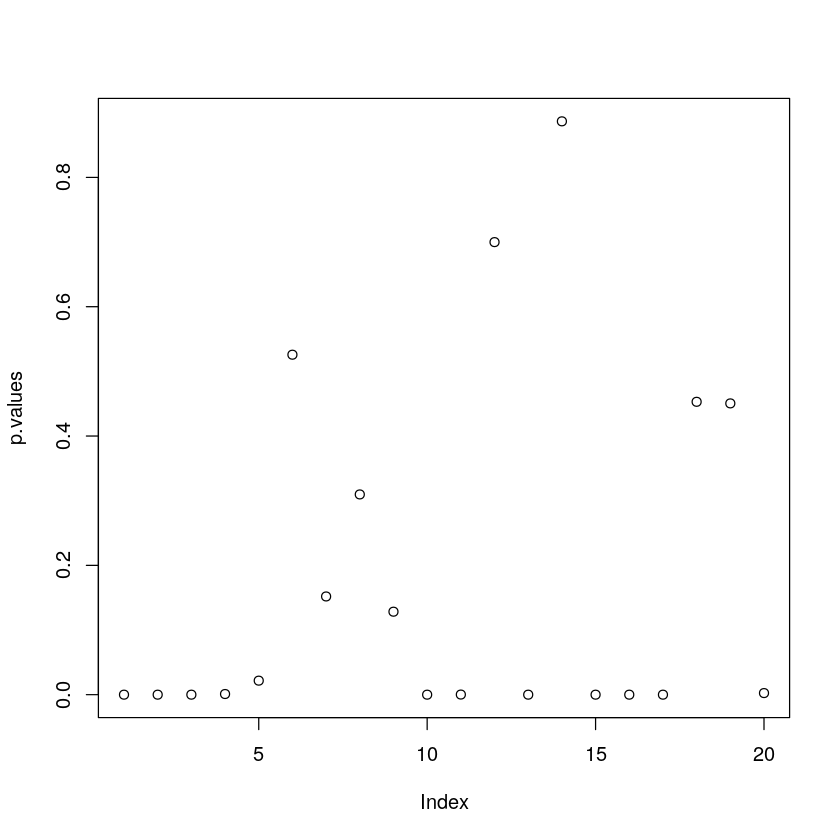

Computing nearest neighbor graph

Computing SNN



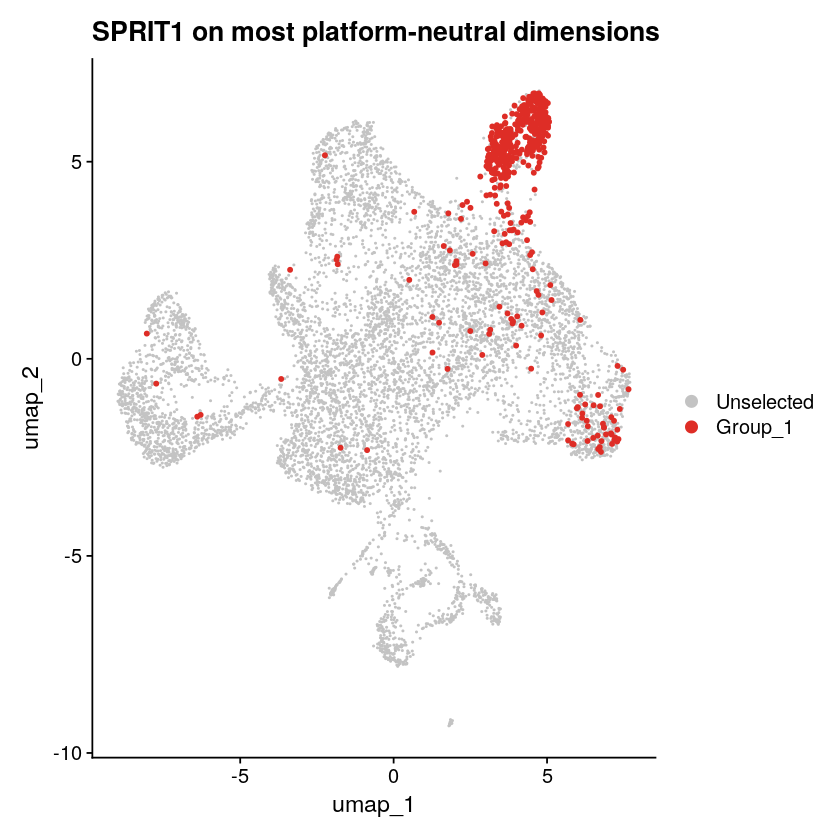

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7987
Number of edges: 262297

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8770
Number of communities: 14
Elapsed time: 0 seconds


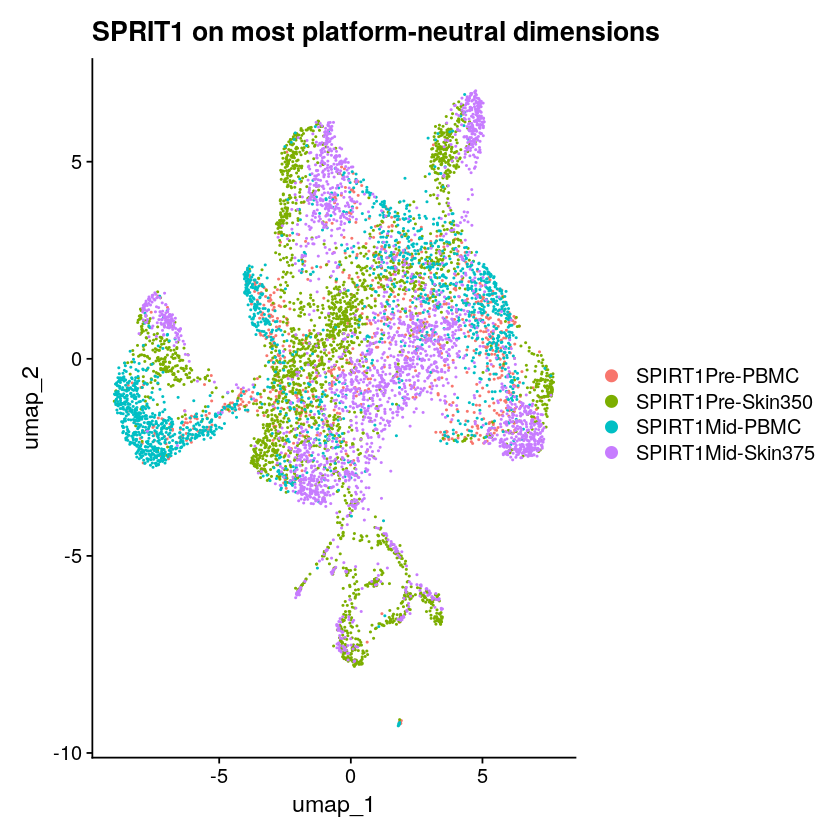

    
       0   1   2   3   4   5   6   7   8   9  10  11  12  13
  1  583 117  14  37   9  46  60   1   0   0   5   0   1   0
  2    5  36  10   0   1  23  37 367   1   0   0   0   0   0
  3    3   5   0 562   0   5   0   1   0   0   0   0   0   1
  4  284 208   4  16   9  87  93   1   1   0   1   0   4   0
  5   79  10   9   2 423  11  74   0   0   0   1   0   0   0
  6   18   8  11   0   4   4  56   0  21   0   0   0   0   0
  7  187  59   3   8  11   7  27   2   0   0  20   0   0   0
  8    5   0   0   1   2   0   6   0   0   0   6   0   0   0
  9   29  40   9   0   2   3  39   0 118   0   2   0   0   1
  10   3   0  10   0   1   0   0   0 157   0   0   0   2   0
  11   0   0   0   2   1  19   0   1   0   0   0   0   0   0
  14  10   4   0  26   6   3   1   0   0   0  14   0   0   0
  15   7   4   1   0   6   0  16   0   0   0  53   0   0   2
  18   2   0   0   1   0   0   0   0   0   0   0  74   0   0
  19   0   0   0   0   0   0   0   0   0   0   0  15   0   0
  20   0   0   0   

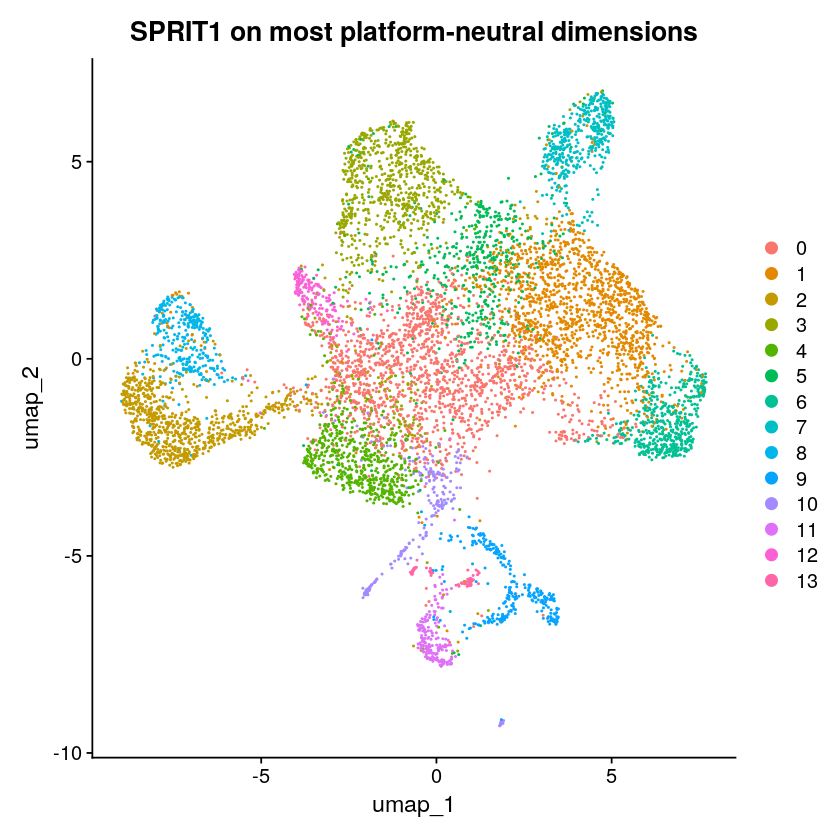

In [4]:
s <- print.cluster.overlap("outs-harmonize1/SPIRT1.RData", "SPRIT1", clusters, "2")

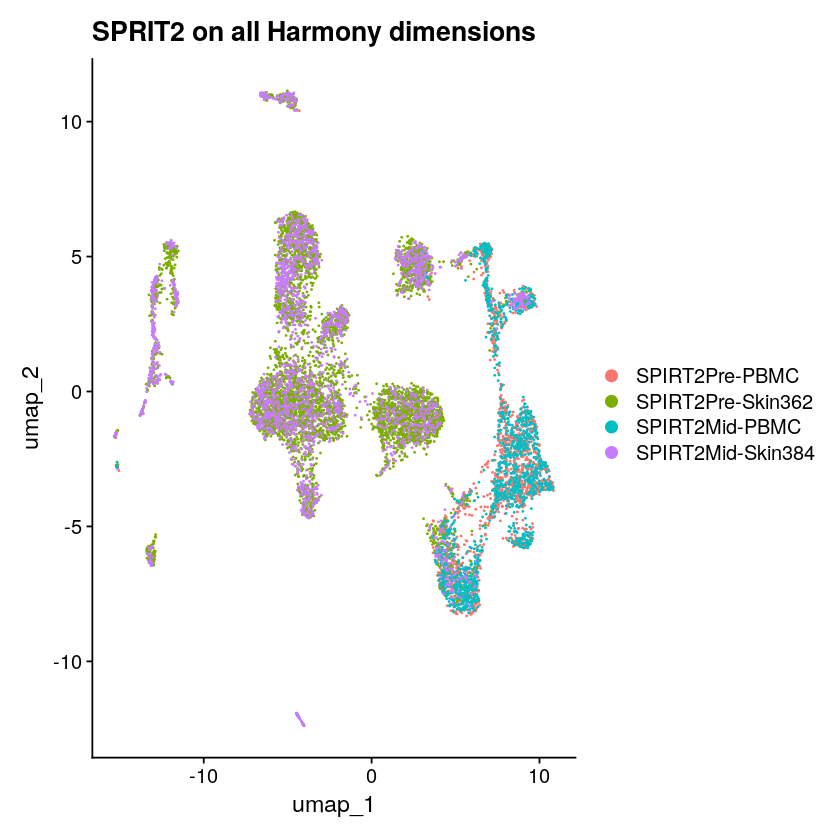

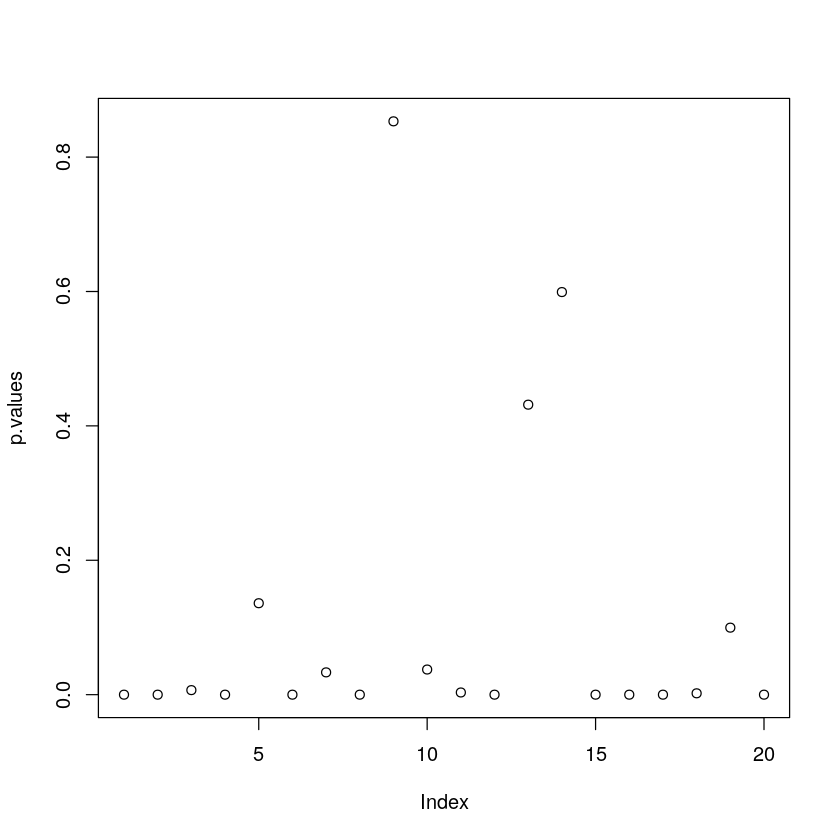

Computing nearest neighbor graph

Computing SNN



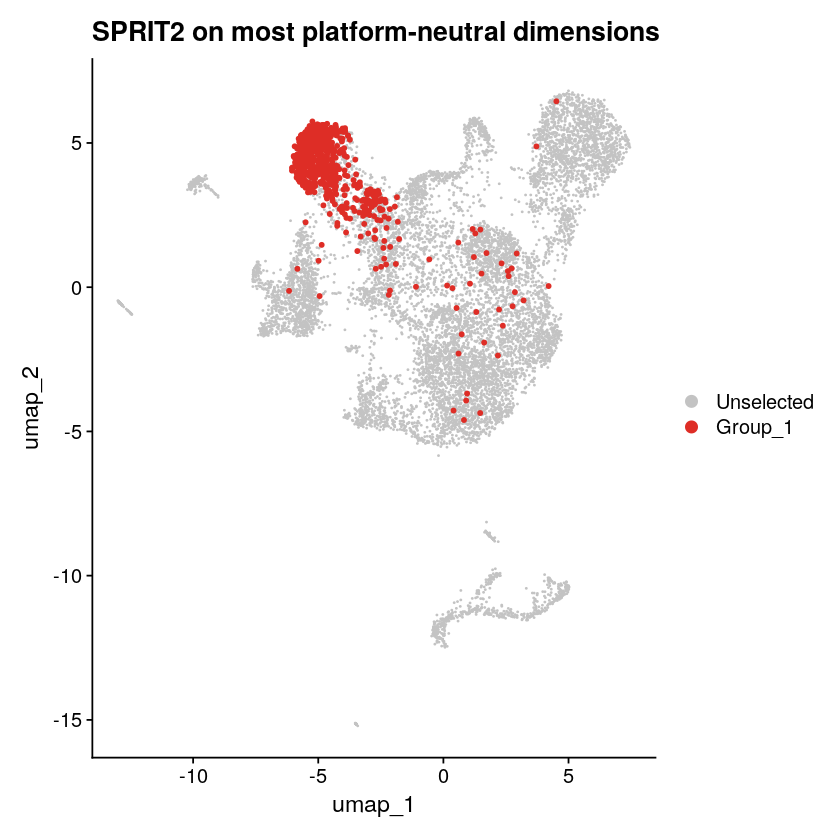

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11243
Number of edges: 360829

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8876
Number of communities: 16
Elapsed time: 1 seconds


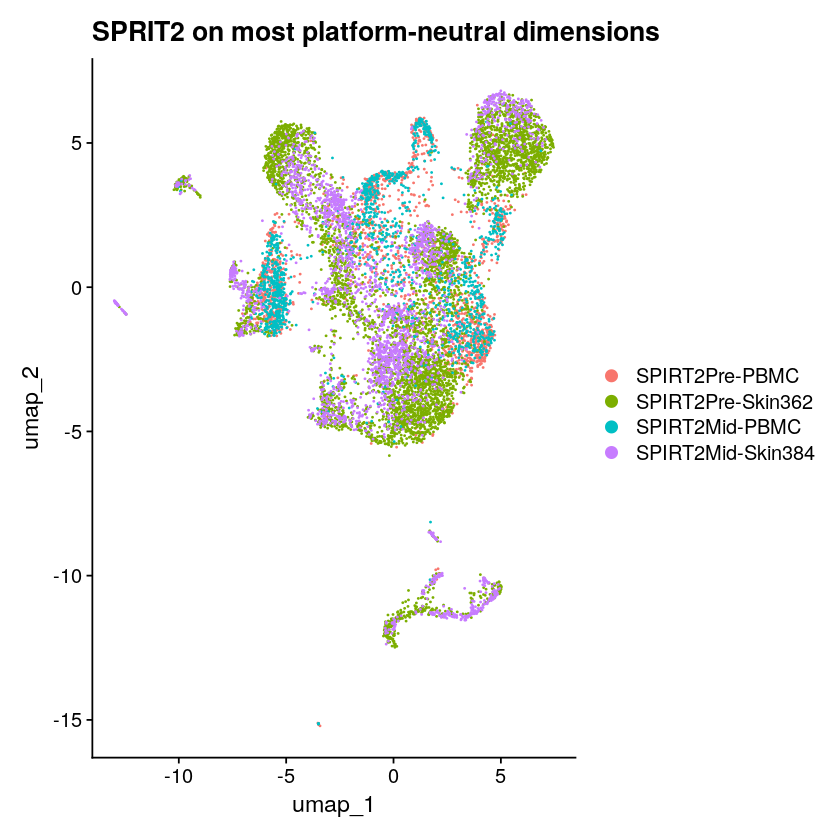

    
        0    1    2    3    4    5    6    7    8    9   10   11   12   13   14
  1   877  120   35  223   57  143   34   19    0    1    0    0    0    0    0
  2     9   24    1    4  591   28    1    0    0    3    0    0    0    0    0
  3     2    5 1268    3   14   13   14    0    0    0    1    0    0    0    0
  4   515   94    9   11  180  124    5    1    0   10    0    0    0    0    0
  5     7  610    1    1    5   26   16   15    0   15    1    0    0    0    0
  6   143   35    1    7    1    4    5    0    0  135    0    0    0    0    0
  7    89    5   10    4   51   41    2   71    0    0    0    0    0    0    0
  8    15    3    1    3    1    1    0   14    0    0    0    0    0    0    0
  9   240   13    1   22    2   16    2   13    0   62    1    0   90    0    0
  10    2    7    1   39    0    5    2    2    0    1   91    0   50    0    0
  11    2    1    1    1   40    1    1    0    0    0    0    0    0    0    0
  12    0    0    2    0    0    0 

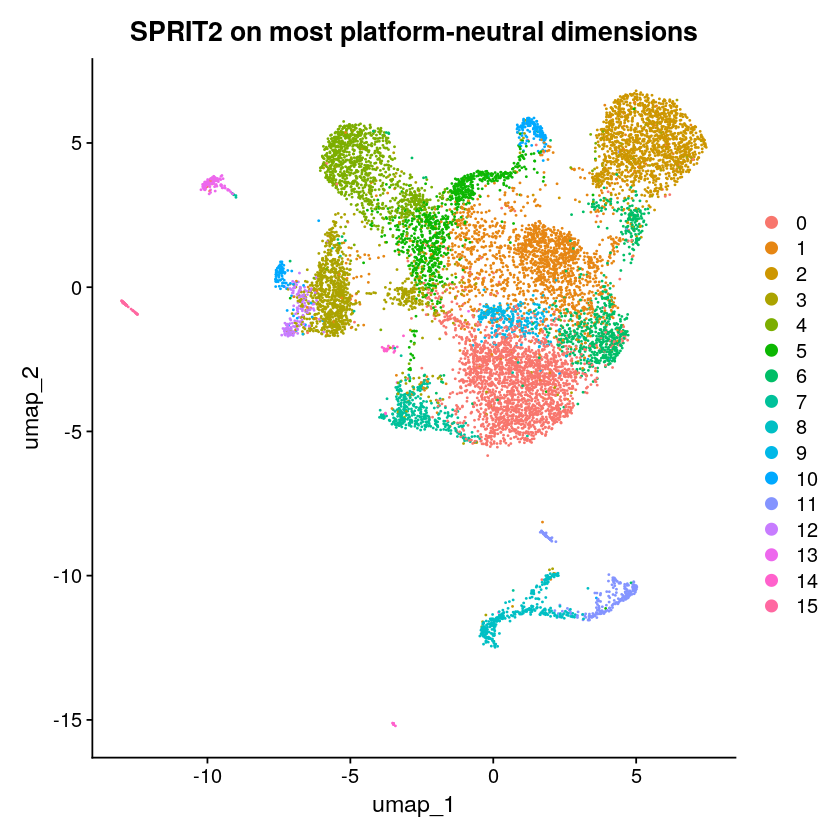

In [5]:
s <- print.cluster.overlap("outs-harmonize1/SPIRT2.RData", "SPRIT2", clusters, "2")

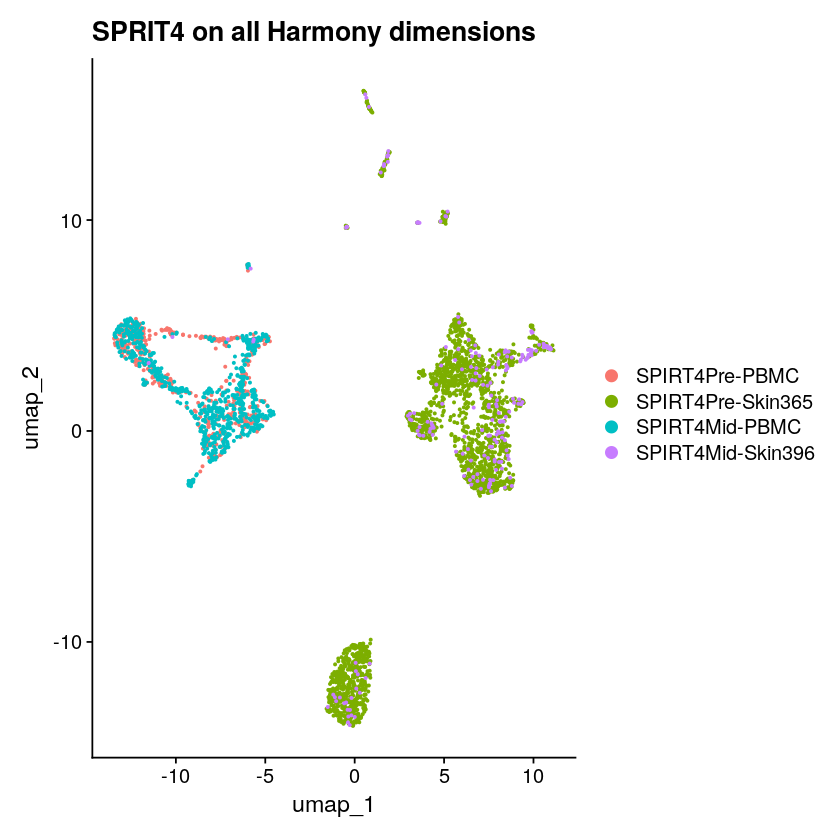

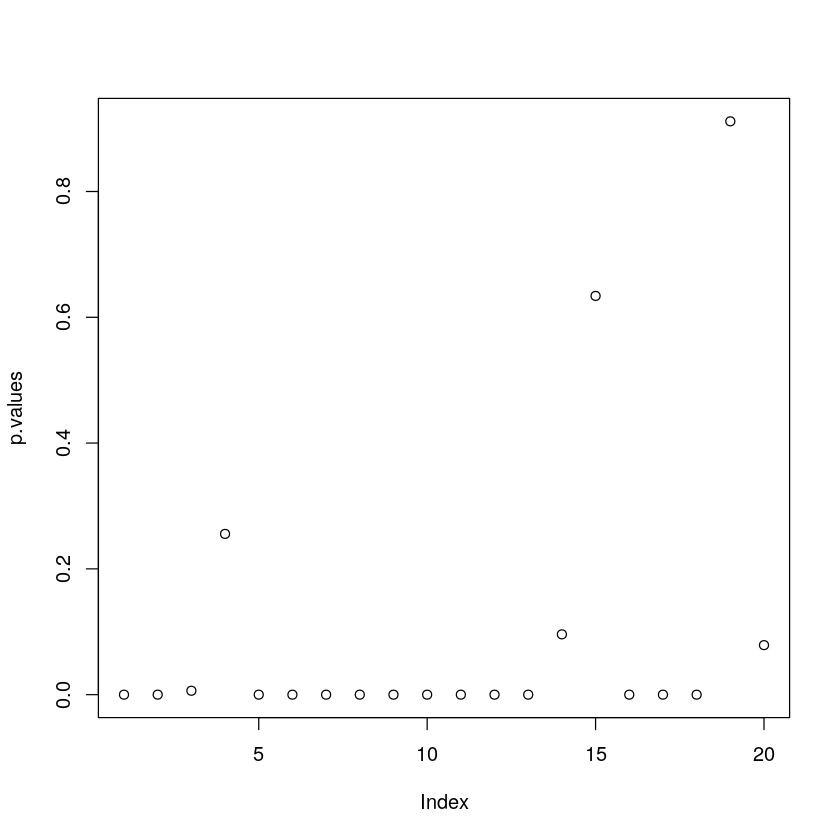

Computing nearest neighbor graph

Computing SNN



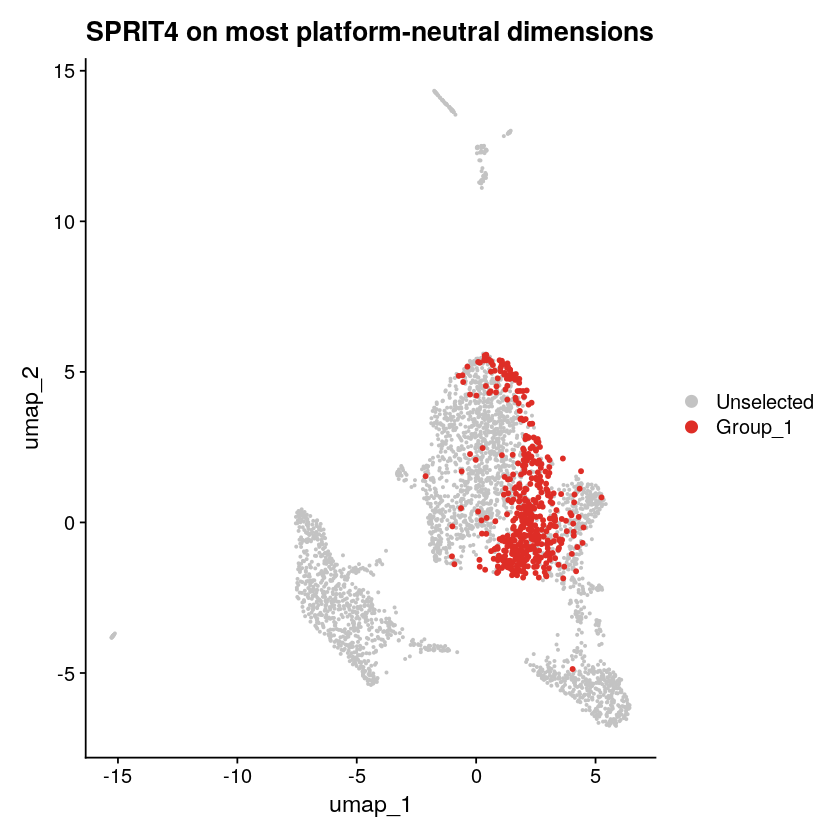

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3442
Number of edges: 112710

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8497
Number of communities: 9
Elapsed time: 0 seconds


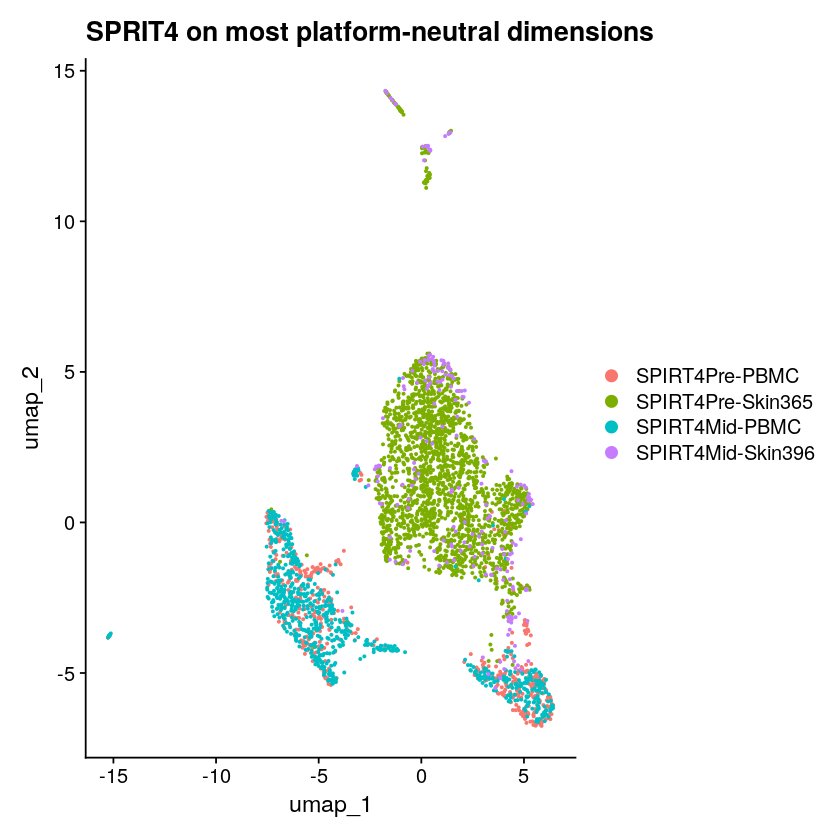

    
       0   1   2   3   4   5   6   7   8
  1  256   3  13   0   1  14   1   0   0
  2  130   0 315   0   9   7   0   0   0
  3  494   0   8   0   0   1   0   0   0
  4  215   0  22   0   5   1   0   0   1
  5   13   0  44   9 142   0   0   0   0
  6   26   1  36   0   4   0   1   0   0
  7   50   0   6   0   0  53   1   0  12
  8    2   0   0   0   0   3   0   0   1
  9   26   0  18   0   0   1  13   0   4
  10   0   0   8   0   1   0  36   0   0
  11   3   0   1   0   0   1   0   0   1
  14   2   1   0   0   0   6   0   0   5
  15   2   0   0   0   1   3   0   1  16
  18   0   0   0   0   0   0   0  12   0
  19   0   0   0   0   0   0   0   1   0
  21   0   0   0   0   0   0   0   4   0
  22   0   0   0   0   0   0   0  28   0
  23   0   0   0   0   0   0   0   1   0
  24   0   0   0   0   0   0   0   2   0
  25   0   0   0   0   0   0   0   9   0
  26   0   0   0   0   0   1   5   1   4
  27   0   0   0   0   0   0   0  26   0
  28   0   0   0   0   0   0   0   1   0
  29   0   

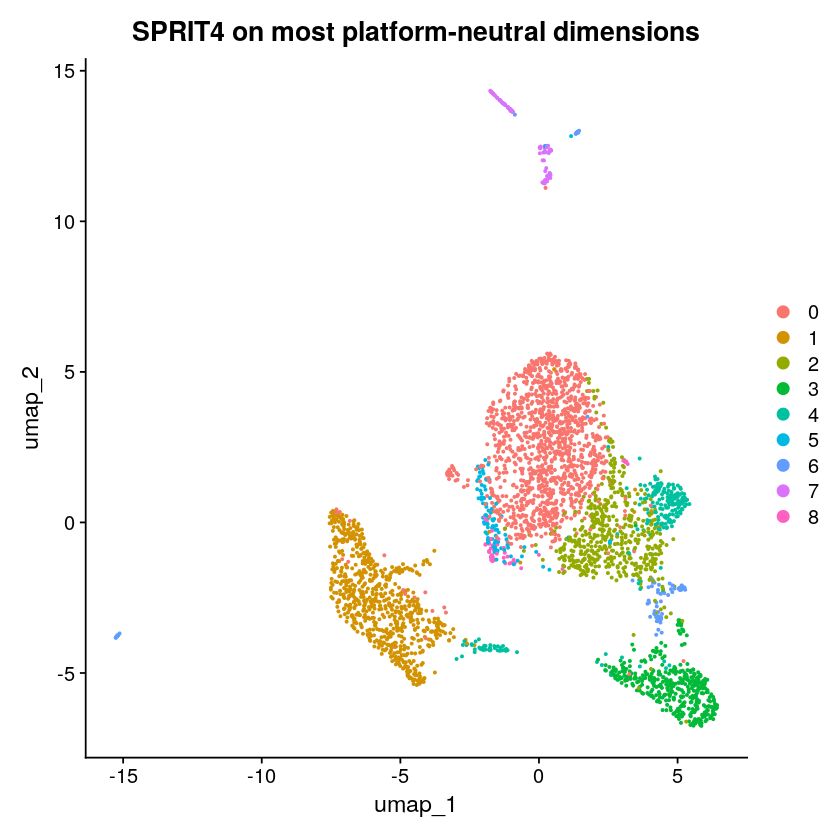

In [6]:
s <- print.cluster.overlap("outs-harmonize1/SPIRT4.RData", "SPRIT4", clusters, "2")

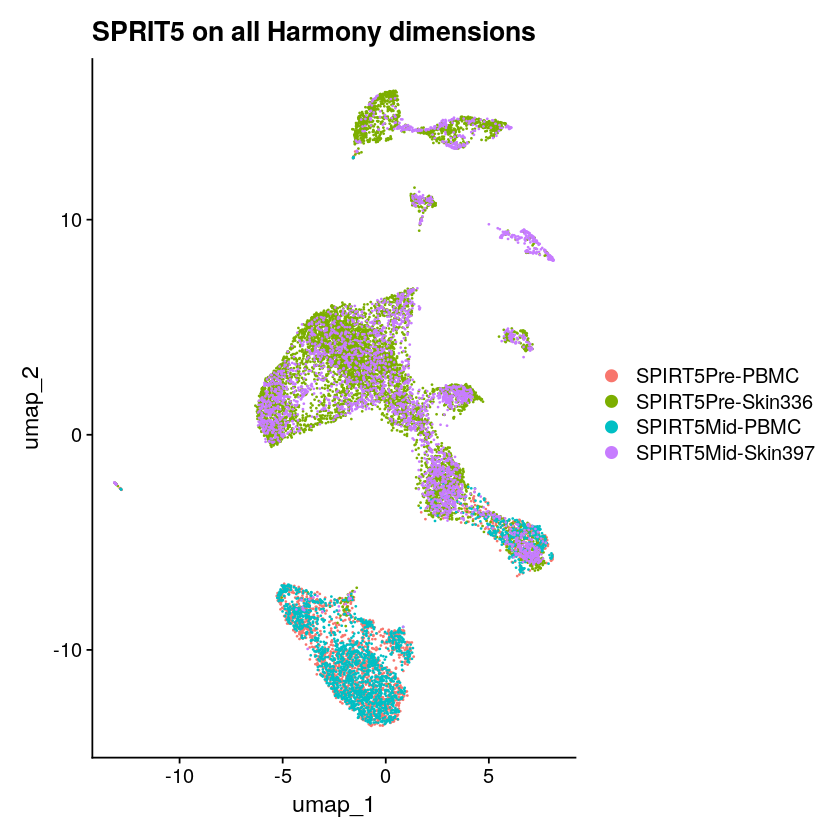

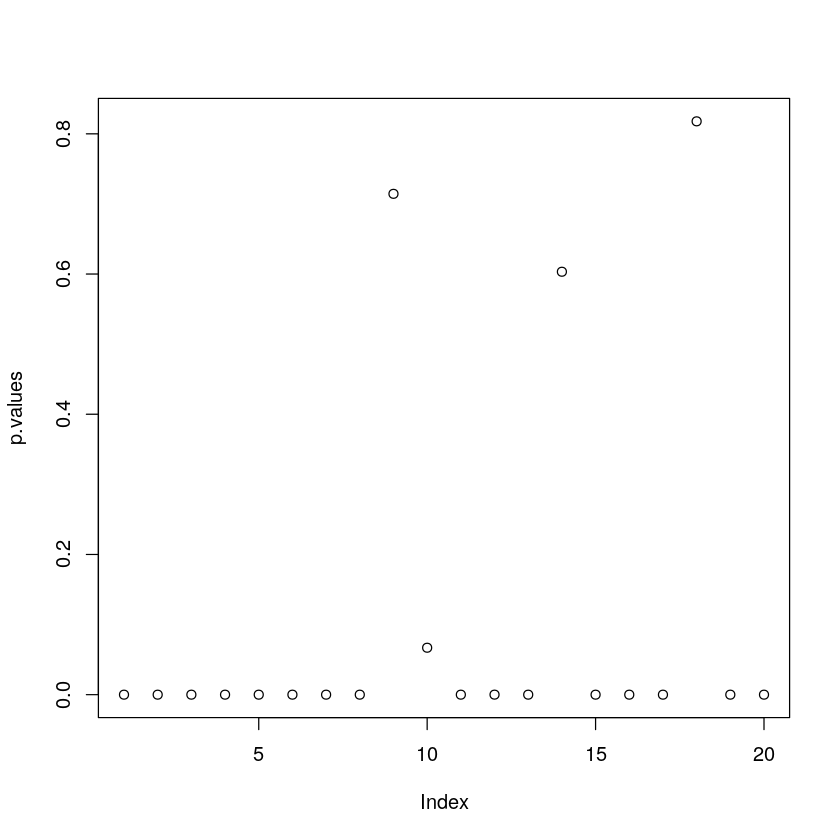

Computing nearest neighbor graph

Computing SNN



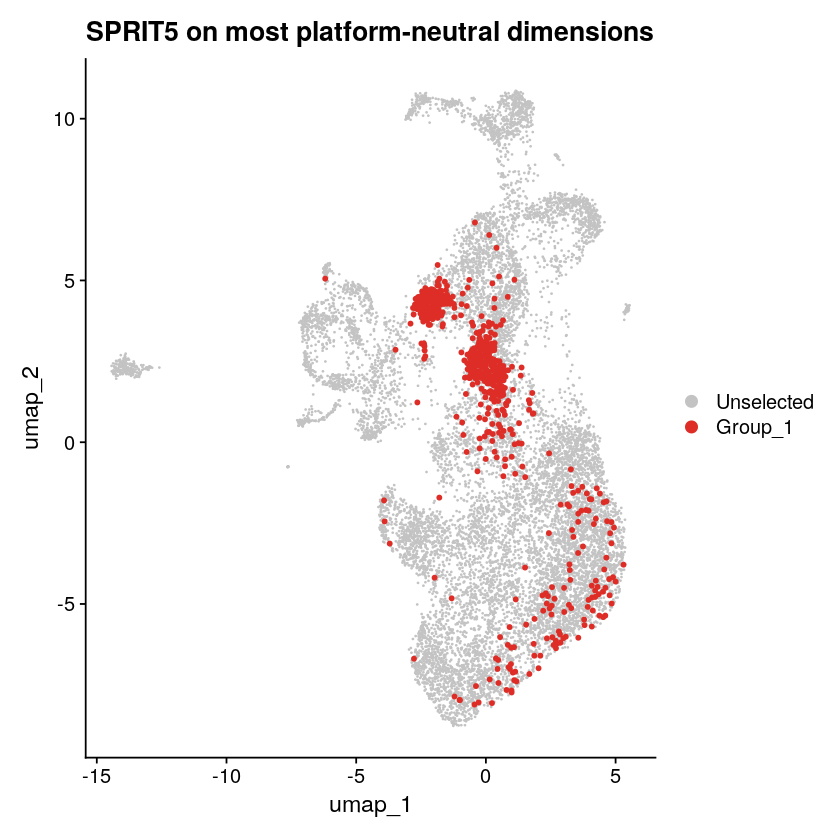

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13802
Number of edges: 438915

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8831
Number of communities: 14
Elapsed time: 2 seconds


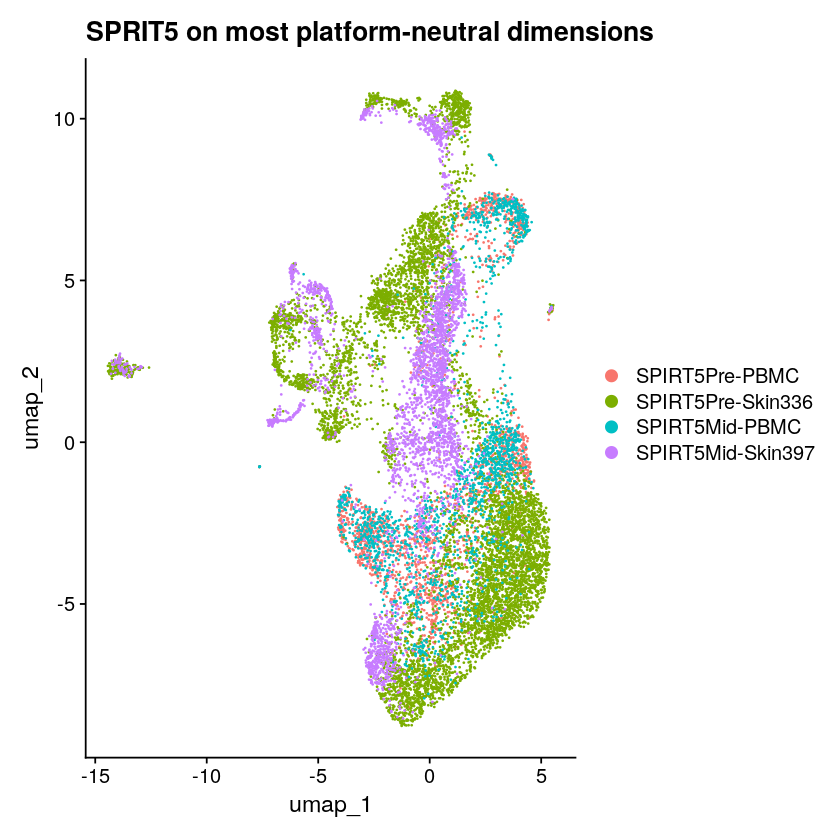

    
        0    1    2    3    4    5    6    7    8    9   10   11   12   13
  1  1211  107   19   25    0  208   16    1   16    0    2    0    0    1
  2   130   25   15  457    0   35    5    0    4    0    0    0    0    0
  3    40  993    1    0    0    0    1    0    0    0    0    0    0    0
  4   560   23   37   58    0  219    1    0   10    0    0    0    0    0
  5    16    1 1109  360    0    2    0    5    0    0    0    0    0    0
  6    18    0    8   93    0   32    0    1    0    0    0    0    0    0
  7   107   23    2   22    1  211    0    0    2    0    1    0    0    0
  8     7    0    0    9    0   21    0    0    0    0    0    2    0    0
  9    47    0    4   53    0   79    0    2    1    0  124    0    0    0
  10    0    0   18    3    0    0    0  511    0    0   43    0    0    0
  11   29   13    1    2    0    5    1    0    0    0    0    0    0    0
  14   20  101    0    2    0   44    0    0    0    0    0    0    0    0
  15    7    1   15 

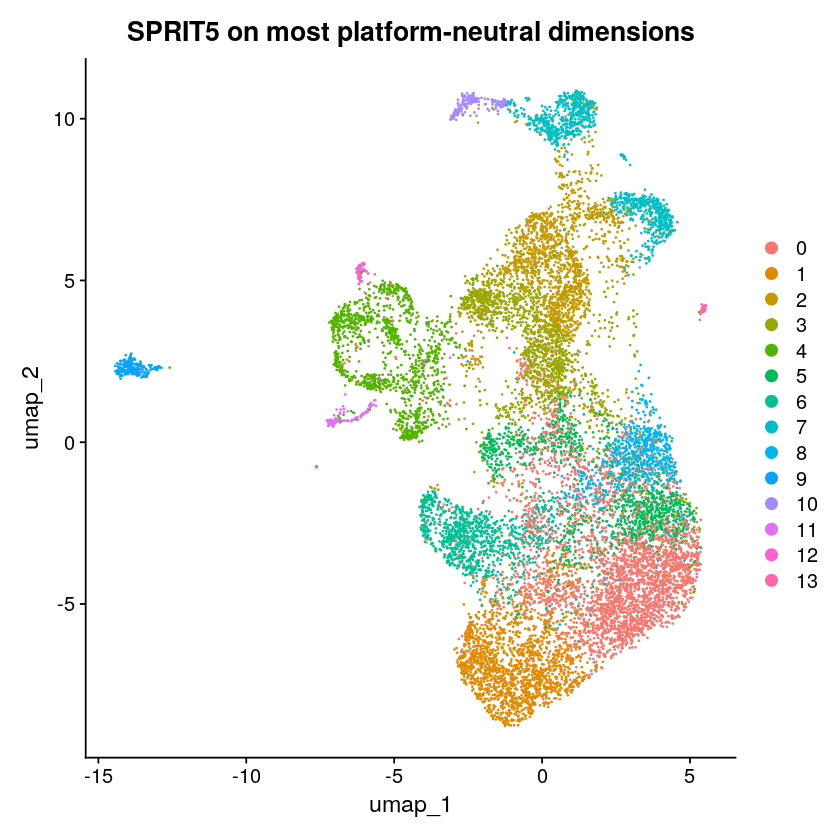

In [7]:
s <- print.cluster.overlap("outs-harmonize1/SPIRT5.RData", "SPRIT5", clusters, "2")